<a href="https://colab.research.google.com/github/OSAKAAI/DEEP_LEARNING/blob/main/Lost_And_Found.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow
from google.colab import userdata

# Access the API key from Colab secrets
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)


# Access the Lost-Found-Items dataset
project = rf.workspace("mangoesclassifierdetector").project("lost-found-items")
dataset = project.version(1).download("yolov8")

# Check downloaded files
!ls {dataset.location}

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lost-Found-Items-1 in yolov8:: 100%|██████████| 4486/4486 [00:00<00:00, 7510.42it/s]


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!ls {dataset.location}/train/images | head -n 10

011e30cde5db6531771adf7f4502bcaa_jpg.rf.08ee6ea92ca9781a36faba95e2a29587.jpg
011e30cde5db6531771adf7f4502bcaa_jpg.rf.e49600932cdf03d593dcf28b6fd83031.jpg
011e30cde5db6531771adf7f4502bcaa_jpg.rf.f4c61268060503bae976e9e51b004b12.jpg
0378d5723453e969b500441371335314_jpg.rf.0abced34883e68cdeb03ce57bdd0b969.jpg
0378d5723453e969b500441371335314_jpg.rf.9a663d91b63b280085331056511f7beb.jpg
0378d5723453e969b500441371335314_jpg.rf.b45a3b052307b3de98a2bc384e883e47.jpg
0a62d5bf048c3b3f3334940bd8adfcec_jpg.rf.51bf5247c79803965bf5392dbca014d6.jpg
0a62d5bf048c3b3f3334940bd8adfcec_jpg.rf.9793919df471872d34209dc42b2851dd.jpg
15d5e7d11fe0f60d6a86d575f40d10fa_jpg.rf.13fa183ea660fd34620a589c7dfe1755.jpg
15d5e7d11fe0f60d6a86d575f40d10fa_jpg.rf.a54118a48e5bc1f543935eb96a75f045.jpg


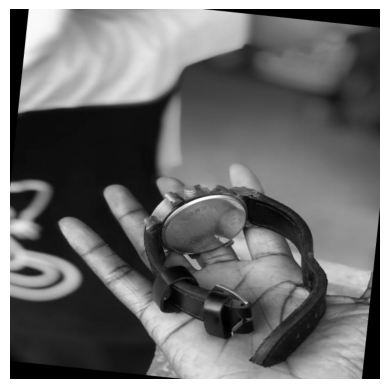

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Pick one image from the train set
img_path = os.path.join(dataset.location, "train/images", os.listdir(dataset.location + "/train/images")[0])

# Load and show
img = cv2.imread(img_path)[:, :, ::-1]  # Convert BGR to RGB
plt.imshow(img)
plt.axis("off")
plt.show()


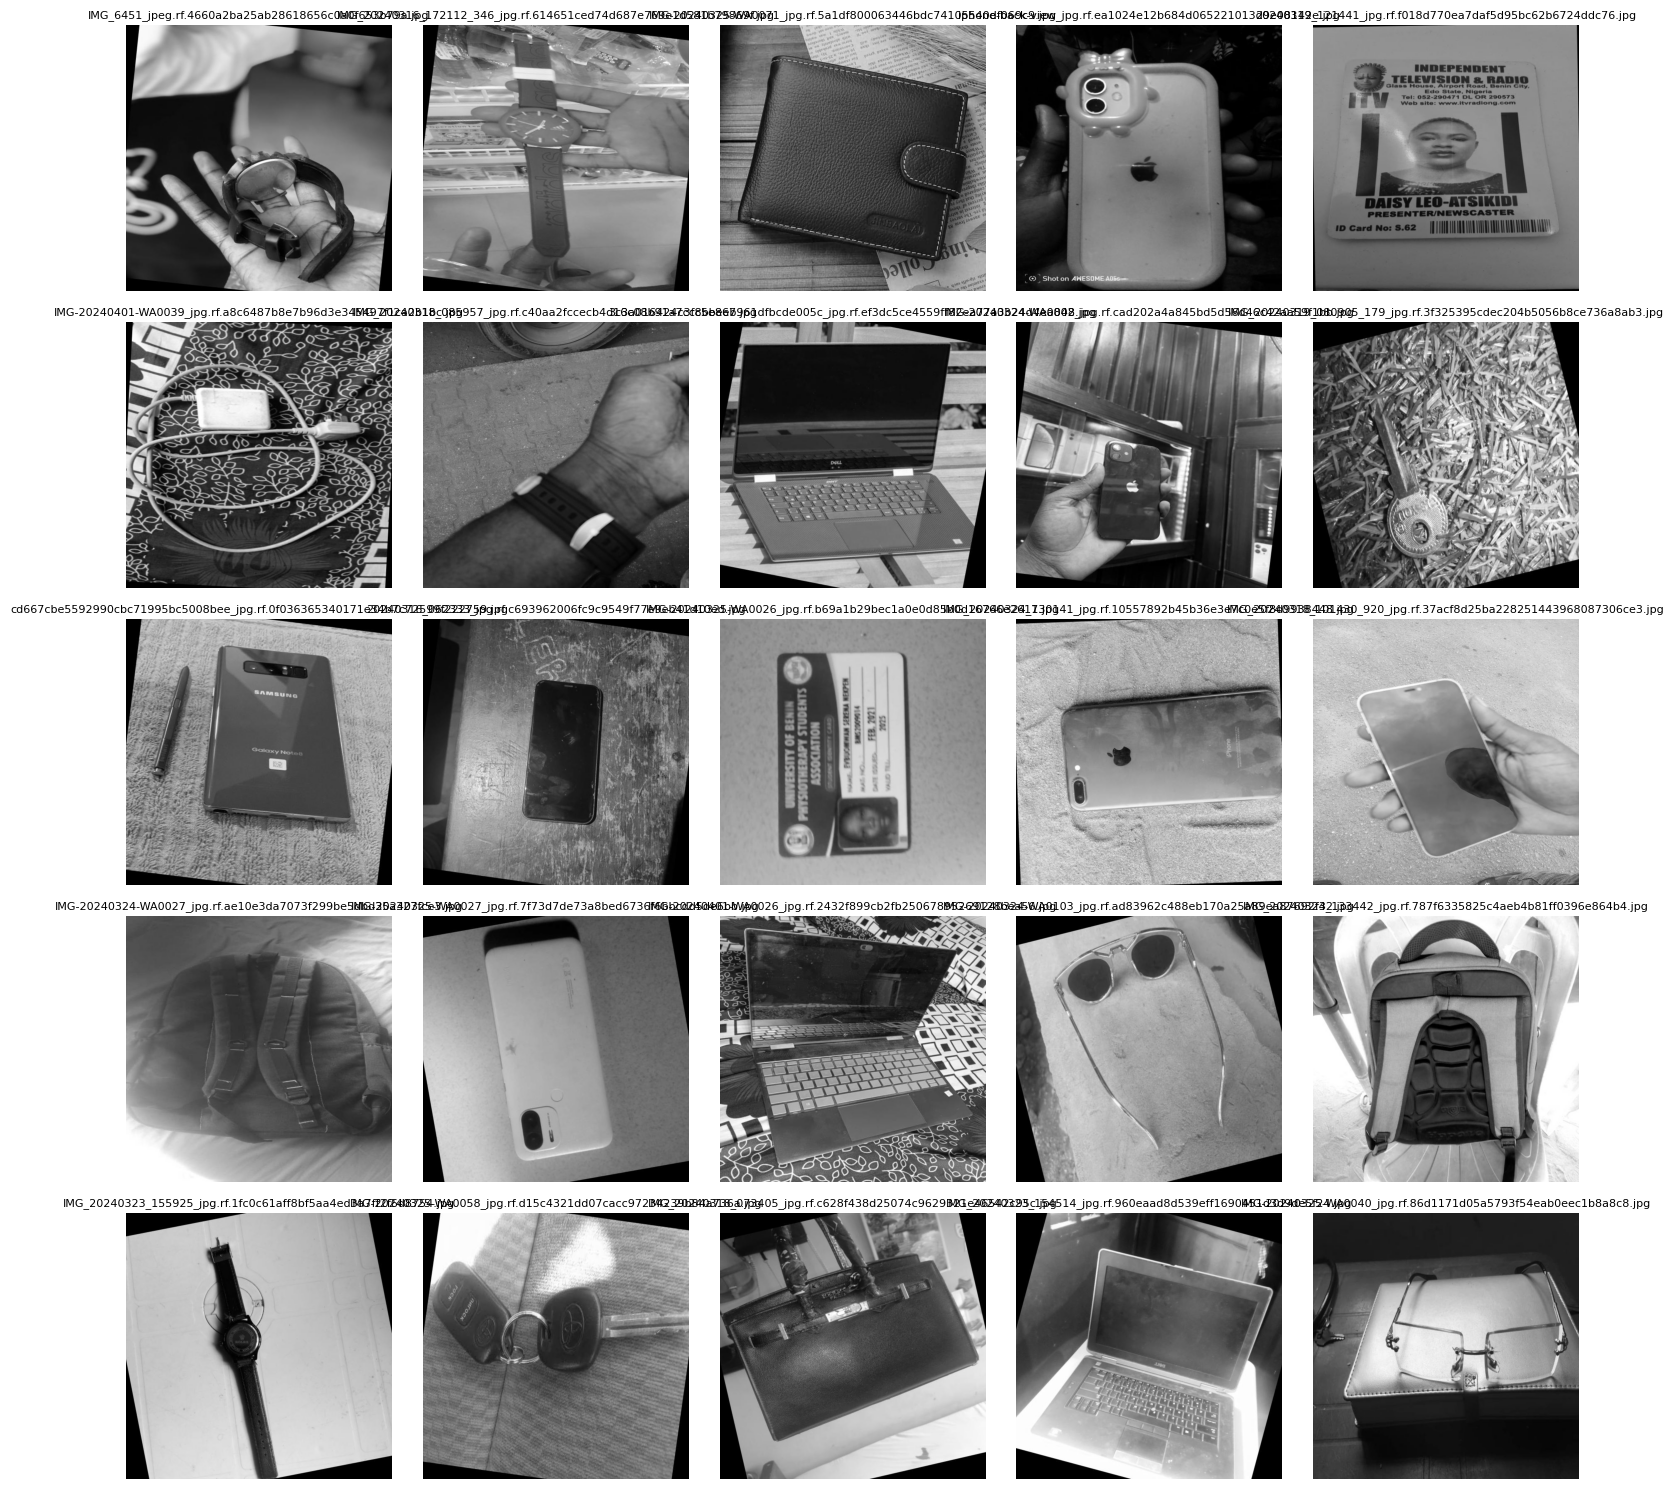

In [ ]:
# looking at all the images in batches or you can say in a grid
import matplotlib.pyplot as plt
import cv2
import os

# Path to images
img_dir = os.path.join(dataset.location, "train/images")
img_files = os.listdir(img_dir)

# Show first 25 images (5x5 grid)
plt.figure(figsize=(15, 15))
for i, img_name in enumerate(img_files[:25]):  # change 25 → more/less images
    img_path = os.path.join(img_dir, img_name)
    img = cv2.imread(img_path)[:, :, ::-1]  # BGR → RGB

    plt.subplot(5, 5, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os # for counting how many images are there

base_path = "/content/Lost-Found-Items-1"

for split in ["train", "valid", "test"]:
    img_count = len(os.listdir(os.path.join(base_path, split, "images")))
    label_count = len(os.listdir(os.path.join(base_path, split, "labels")))
    print(f"{split}: {img_count} images, {label_count} labels")


train: 1959 images, 1959 labels
valid: 183 images, 183 labels
test: 95 images, 95 labels


In [ ]:
#see the no. of classes
import yaml

# Load YAML file
with open("/content/Lost-Found-Items-1/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

# Get classes
class_names = data_yaml["names"]
print(" Number of Classes (nc):", data_yaml["nc"])
print("\n Class Names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


 Number of Classes (nc): 51

 Class Names:
0: Backpack
1: Belt-bag
2: Car-key-Chevrolet
3: Car-key-Ford
4: Car-key-Honda
5: Car-key-Hyundai
6: Car-key-Kia
7: Car-key-Lexus
8: Car-key-Mercedes-Benz
9: Car-key-Mitsubishi
10: Car-key-Nissan
11: Car-key-Toyota
12: Car-key-Volkswagen
13: Car-key-non-specific
14: Card
15: Cross-bag
16: Electronic-devices-AirPods
17: Electronic-devices-AirPods-case
18: Electronic-devices-charger
19: Electronic-devices-earphones
20: Electronic-devices-headphones
21: Electronic-devices-laptop
22: Electronic-devices-laptop-charger
23: Electronic-devices-phone
24: Electronic-devices-phone-charger
25: Electronic-devices-powerbank
26: Electronic-devices-tablet
27: Glasses
28: Handbag
29: Key
30: Laptop-bag
31: Smart-watch-black
32: Smart-watch-gold
33: Smart-watch-pink
34: Smart-watch-silver
35: Smart-watch-white
36: Sunglasses
37: Travel-bag
38: Wallet-black
39: Wallet-brown
40: Wallet-grey
41: Wallet-multicolor
42: Wallet-pink
43: Wallet-red
44: Wallet-turquoise


In [ ]:
import os

base_path = "/content/Lost-Found-Items-1/train"  # change to valid/test if needed

images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Read class names from data.yaml
import yaml
with open("/content/Lost-Found-Items-1/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml["names"]

# Loop through all images and print labels
for img_file in os.listdir(images_path):
    if img_file.endswith((".jpg", ".png")):
        img_name = img_file
        label_file = img_file.rsplit(".", 1)[0] + ".txt"
        label_path = os.path.join(labels_path, label_file)

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                labels = f.readlines()
                for line in labels:
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    print(f"   → {class_names[class_id]}  |  {line.strip()}")
        else:
            print("  No label file found!")


   → Watch-black  |  45 0.603125 0.7171875 0.5625 0.534375
   → Watch-black  |  45 0.44296875 0.45078125 0.4421875 0.865625
   → Wallet-black  |  38 0.50078125 0.5 0.8671875 0.775
   → Electronic-devices-phone  |  23 0.47109375 0.54140625 0.64453125 0.91328125
   → Card  |  14 0.47578125 0.453125 0.9046875 0.69375
   → Electronic-devices-laptop-charger  |  22 0.48125 0.51640625 0.9625 0.7546875
   → Watch-black  |  45 0.5875 0.7609375 0.5109375 0.39453125
   → Electronic-devices-laptop  |  21 0.5 0.5 1 1
   → Electronic-devices-phone  |  23 0.4375 0.63984375 0.2828125 0.3953125
   → Key  |  29 0.346875 0.56328125 0.3828125 0.6921875
   → Electronic-devices-phone  |  23 0.59453125 0.440625 0.6515625 0.703125
   → Electronic-devices-phone  |  23 0.534375 0.50234375 0.353125 0.565625
   → Card  |  14 0.4703125 0.5046875 0.521875 0.78671875
   → Electronic-devices-phone  |  23 0.5796875 0.49453125 0.840625 0.4703125
   → Electronic-devices-phone  |  23 0.46953125 0.56015625 0.6125 0.675
  

In [ ]:
import cv2, os # resizing the data

path = dataset.location + "/train/images"
resized_path = "/content/resized_images"
os.makedirs(resized_path, exist_ok=True)

for img_name in os.listdir(path):
    img = cv2.imread(os.path.join(path, img_name))
    img = cv2.resize(img, (640, 640))   # resize to YOLO size
    cv2.imwrite(os.path.join(resized_path, img_name), img)

img = img / 255.0 # noramalizing the picture or pixel value



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # augmentation of data

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)


In [ ]:
import os #checking if there are any corrupt data in there

bad_files = []
for img_name in os.listdir(path):
    try:
        img = cv2.imread(os.path.join(path, img_name))
        if img is None:
            bad_files.append(img_name)
    except:
        bad_files.append(img_name)

print("Corrupted files:", bad_files)


Corrupted files: []


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
# 'yolov8n.pt' is the smallest version. You can also use 'yolov8s.pt', 'yolov8m.pt', etc.
model = YOLO('yolov8n.pt')

# Train the model
# Make sure to replace 'path/to/your/data.yaml' with the actual path to your YAML file.
results = model.train(data='/content/Lost-Found-Items-1/data.yaml', epochs=50, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Lost-Found-Items-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7

In [ ]:
from ultralytics import YOLO

# Load your best trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Validate the model
metrics = model.val()  # This will print out all the performance metrics

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,015,593 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1197.1±470.1 MB/s, size: 40.3 KB)
val: Scanning /content/Lost-Found-Items-1/valid/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 183/183 378.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 12/12 3.8it/s 3.2s
                   all        183        190      0.398       0.47      0.457      0.378
              Backpack          9          9      0.589          1      0.846      0.736
              Belt-bag          1          1      0.122      0.609      0.199      0.179
         Car-key-Honda          1          1          0          0      0.124      0.112
         Car-key-Lexus          1          1          0          0          0          0
    Car-key-Mitsubishi          1    


image 1/1 /content/Lost-Found-Items-1/valid/images/20240315_131234_jpg.rf.be222b459dbfd5cd552307d3e1065dc9.jpg: 640x640 1 Glasses, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


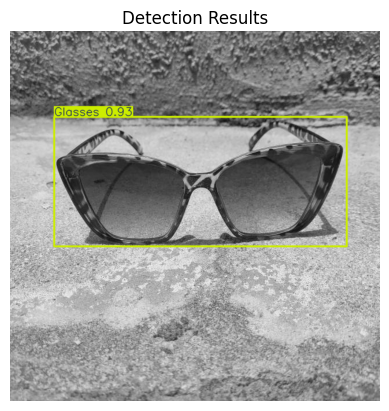

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your best trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Path to your new image
image_path = '/content/Lost-Found-Items-1/valid/images/20240315_131234_jpg.rf.be222b459dbfd5cd552307d3e1065dc9.jpg'

# Make predictions
results = model(image_path)

# Show the results
for r in results:
    # Plot results image
    im_array = r.plot()

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
    plt.title("Detection Results")
    plt.axis('off')
    plt.show()

In [ ]:
pip install ultralytics opencv-python


<IPython.core.display.Javascript object>

 Image captured: photo.jpg

0: 480x640 1 Electronic-devices-phone, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
 Detected objects:
 - Electronic-devices-phone (0.72)


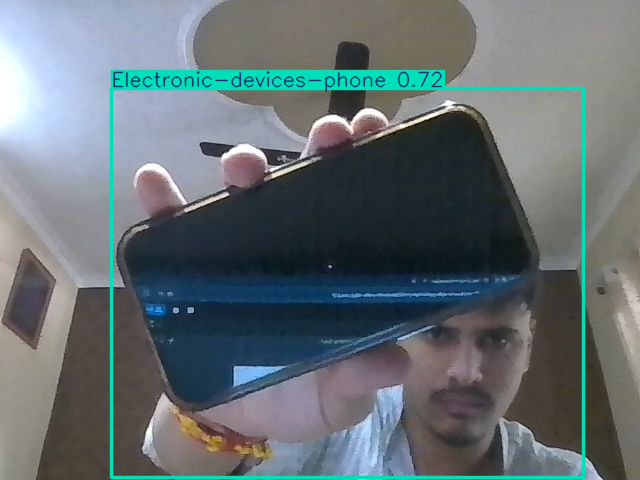

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image

# Function to capture photo
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Load trained YOLO model (replace with your trained weights)
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Capture a photo
img_path = take_photo()
print(f" Image captured: {img_path}")

# Read image
img = cv2.imread(img_path)

# Run detection
results = model(img)
r = results[0]

# Check detections
if len(r.boxes) == 0:
    print(" No objects detected.")
else:
    print(" Detected objects:")
    for box in r.boxes:
        cls = int(box.cls[0])
        label = r.names[cls]
        conf = box.conf[0]
        print(f" - {label} ({conf:.2f})")

# Display detection result with bounding boxes
r.show()
